In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
sym.init_printing(use_latex = "mathjax")

/home/vboxuser/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Enter your name below and run the cell:

Individual cells can be run with `Ctrl` + `Enter`

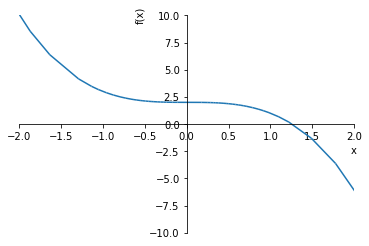

In [3]:
x = sym.symbols('x')
expr = -x ** 3 + 2

sym.plot(expr, xlim=(-2, 2), ylim=(-10, 10));

In [4]:
sym.Derivative(expr)

d ⎛   3    ⎞
──⎝- x  + 2⎠
dx          

In [5]:
sym.Derivative(expr).doit()

    2
-3⋅x 

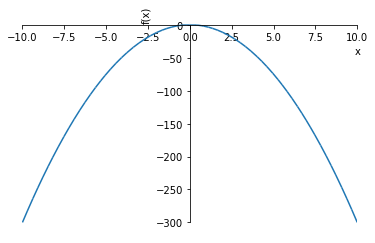

In [6]:
sym.plot(sym.diff(expr));

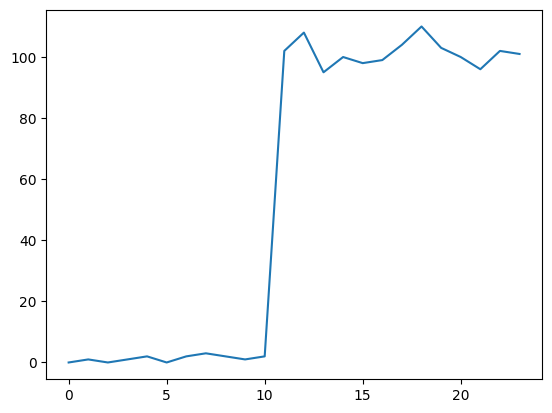

In [2]:
ys = np.array([0, 1, 0, 1, 2, 0, 2, 3, 2, 1, 2, 102, 108,  95, 100,  98,  99, 104, 110, 103, 100,  96, 102, 101])

fig,ax = plt.subplots()
ax.plot([i for i in range(len(ys))], ys);

In [3]:
def make_windows(sequence, windowsize):
    positions = len(sequence) - windowsize + 1
    windows = []
    for i in range(positions):
        windows.append(sequence[i:i+windowsize])
    return windows

def print_padded_seq(seq):
    print("[", ",".join(["{:4d}".format(i) for i in seq]), ']')

def print_sliding_windows(seq, windowsize=3):
    windows = make_windows(seq, windowsize)
    for window in windows:
        print(",".join(["{:4d}".format(i) for i in window]))
   

In [5]:
series = [0, 1, 0, 2, 1, 0, 1, 101, 100, 98, 102, 101]
windowsize = 2

print_padded_seq(series)

print_sliding_windows(series, windowsize=windowsize)
# check(1)

[    0,   1,   0,   2,   1,   0,   1, 101, 100,  98, 102, 101 ]
   0,   1
   1,   0
   0,   2
   2,   1
   1,   0
   0,   1
   1, 101
 101, 100
 100,  98
  98, 102
 102, 101


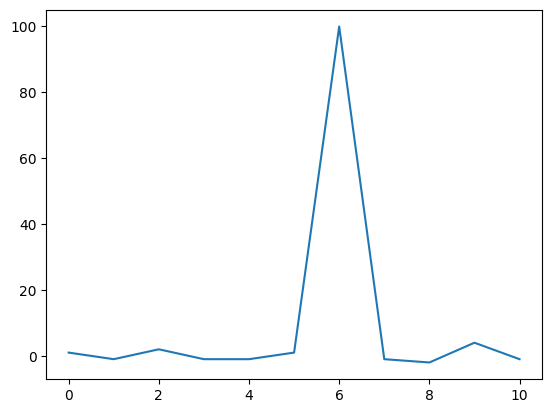

In [7]:
convolutions = []
kernel = np.array([-1,1])
for w in make_windows(series, windowsize=2):
    w = np.array(w)
    convolved = np.dot(w,kernel)
    convolutions.append(convolved)
    
plt.plot(convolutions);
# check(2)

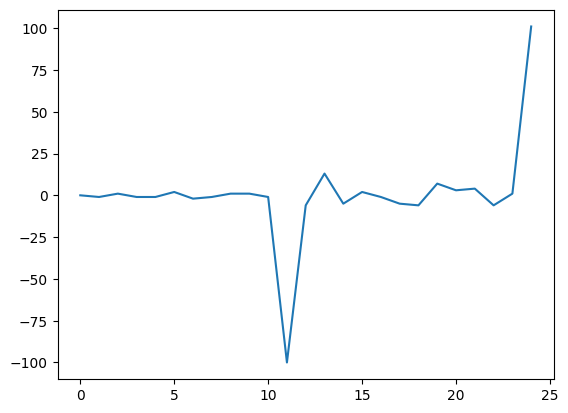

In [8]:
convolved = np.convolve([-1, 1], ys)

fig,ax = plt.subplots()
ax.plot([i for i, _ in enumerate(convolved)], convolved);
# check(3)

**Question:** Why does the graph move up at the end?
The very last value doesn't exist as it is outside the array.